In [1]:
%matplotlib notebook

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import astropy as ap
from astropy.io import ascii
from astropy.io import fits
# print(astropy.__version__)
import specreduce
from matplotlib.gridspec import GridSpec
# import pwv_kpno

### Even though you are submitting these with `git` and this file tells you to rename it, and you should be pushing to a dedicated folder with your username, please also stick your name in this file here, so there's extra redundancy. 

### Margaret Shepherd

The point of this assignment is to:
- get comfortable with photon energy, frequency, and wavelength - calculate power and luminosity
- know now to convert magnitudes, fluxes, photon counts.
- start basic Python scripts and plotting

# Q1. Make plot of the electromagnetic spectrum using Python. (30 pts)
- Your plot should have multiple x-axes - one for wavelength (in meters), one for frequency (in Hz), one for energy (in eV)
    (hint: `gridspec` or `subplots` in general can be used to do this. See if you can find something useful here: https://matplotlib.org/stable/gallery/index) (10 pts)
- axes should be lograthmic, and each of these axes should have ticklabels that are exponential above or below (5 pts)
- the wavelength axes should also have more conventional SI units for km, mm, micron, nm, Angstrom, and picometer labelled (5 pts)
- label each region of the EM spectrum (10 pts)

 Something like this: 

<img src="https://aktinovolia.com/wp-content/uploads/aktinovolia.com-radiation-chart-electromagnetic-spectrum-rf-em-spectrum-rf-electromagnetic-3-.jpg">

or (except you should have energy too) 

<img src="https://multiphaseism.wordpress.com/wp-content/uploads/2013/05/electromagnetic_spectrum.jpg">

# Remember to save your script. Stay organized. You will be reusing code.

You are encouraged to add your own flourishes to the plot.
Joseph is empowered to give out 5 points as he sees fit for aesthetics. 

Keep this plot handy. You should be able to intuitively convert between these values in your head. 

GridSpec(3, 1)


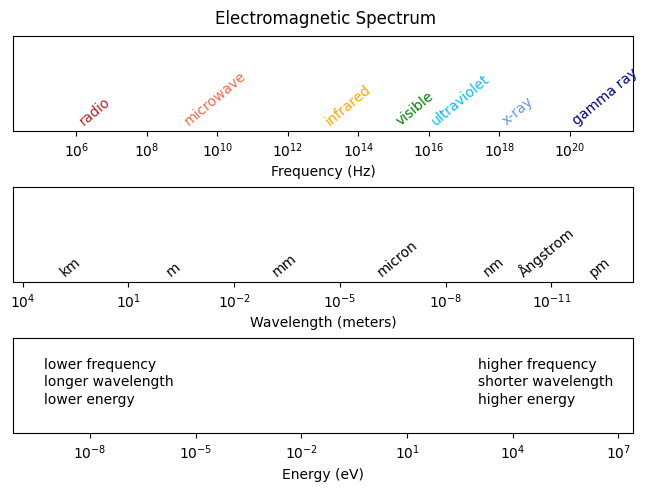

In [19]:
c = 299792458 # m/s
h = 6.62607*(10**(-34)) # J/Hz
frequency = np.linspace(10**5, 10**21) # Hz
wavelength = c/frequency # meters
energy = h*frequency*(6.241509*(10**18)) # eV

# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_multicolumn.html#sphx-glr-gallery-subplots-axes-and-figures-gridspec-multicolumn-py
# https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec
# https://matplotlib.org/stable/gallery/color/named_colors.html
fig = plt.figure(layout="constrained")
gs = GridSpec(3, 1, figure=fig)
print(gs)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])

ax1.plot(frequency, np.ones(shape=len(frequency)), alpha=0)
ax1.set_xscale('log')
ax1.set_xlabel('Frequency (Hz)')
ax1.yaxis.set_visible(False)
labels=['radio', 'microwave', 'infrared', 'visible', 'ultraviolet', 'x-ray', 'gamma ray']
xloc=[10**6, 10**9, 10**13, 10**15, 10**16, 10**18, 10**20]
colors=['firebrick', 'tomato', 'orange', 'green', 'deepskyblue', 'cornflowerblue', 'darkblue']
for i in range(len(labels)):
    ax1.annotate(labels[i], xy=(xloc[i], 0.952), rotation=40, color=colors[i])

ax2.plot(wavelength, np.ones(shape=len(wavelength)), alpha=0)
ax2.set_xscale('log')
ax2.set_xlabel('Wavelength (meters)')
ax2.yaxis.set_visible(False)
ax2.invert_xaxis()
labels=['km', 'm', 'mm', 'micron', 'nm', 'Ångstrom', 'pm']
xloc=[10**3, 10**0, 10**(-3), 10**(-6), 10**(-9), 10**(-10), 10**(-12)]
for i in range(len(labels)):
    ax2.annotate(labels[i], xy=(xloc[i], 0.952), rotation=40)

ax3.plot(energy, np.ones(shape=len(energy)), alpha=0)
ax3.set_xscale('log')
ax3.set_xlabel('Energy (eV)')
ax3.yaxis.set_visible(False)
labels=['lower frequency', 'longer wavelength', 'lower energy', 'higher frequency', 'shorter wavelength', 'higher energy']
xloc=[10**(-9.3), 10**(-9.3), 10**(-9.3), 10**3, 10**3, 10**3]
yloc=[1.02, 1, 0.98, 1.02, 1, 0.98]
for i in range(len(labels)):
    ax3.annotate(labels[i], xy=(xloc[i], yloc[i]))

fig.suptitle("Electromagnetic Spectrum")
plt.show()

# Q2. Dealing with Data from Multiple Sources - adding passbands and atmospheric transmission (30 pts)

### 2.1
Get the Optical Atmospheric Transmission using the `specreduce` package
    `pip install specreduce`
    https://specreduce.readthedocs.io/en/latest/extinction.html

Note that the optical transmission curves do not include the effect of molecules as the website tells you.
Follow their instructions to add 2.3mm of Preciptiable Water Vapr at an Airmass of 1.0 to the optical transmission. 

Get NIR and MIR transmission curves from here (we're not using MIR this week, but you'll use this code next HW as well)
	http://www.gemini.edu/sciops/telescopes-and-sites/observing-condition-constraints/ir-transmission-spectra
(Cerro Pachon, 2.3mm of Precipitable Water Vapor, Airmass 1.0)


### 2.2
Get the LSST Filter Transmissions (ugrizy, filter only) from here:
http://svo2.cab.inta-csic.es/theory/fps3/index.php?mode=browse

and the IRTF (\[JHK\]_MK, filter only) transmissions from here:
https://irtfweb.ifa.hawaii.edu/~nsfcam2/Filter_Profiles.html

## !Please note that the filter tranmissions are determined by counting photons, not measuing energy! 

### 2.3

Finally, get the SEDs of three stars from CALSPEC:
https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/calspec
and for the actual data:
https://archive.stsci.edu/hlsps/reference-atlases/cdbs/current_calspec/

(There is no M5V but there is a M3.5V star - BD-11 3759)


Finally, reconstruct a plot like this (set the wavelength ranges appropriately for the filters I've listed)
<img src="https://www.researchgate.net/profile/C-Chiosi/publication/1925441/figure/fig1/AS:339731901632519@1458009805844/The-filter-sets-used-in-the-present-work-From-top-to-bottom-we-show-the-filter-detector.png">

except replace the middle panel with the atmospheric transmission from your interpolator.

Something like this for the atmosphere plot (but until the wavelength you need): 
<img src="https://www.researchgate.net/profile/Joseph-Shaw-3/publication/260940640/figure/fig3/AS:296902361927680@1447798447054/Atmospheric-transmittance-versus-wavelength-calculated-with-Modtran5-for-a-zenith.png">

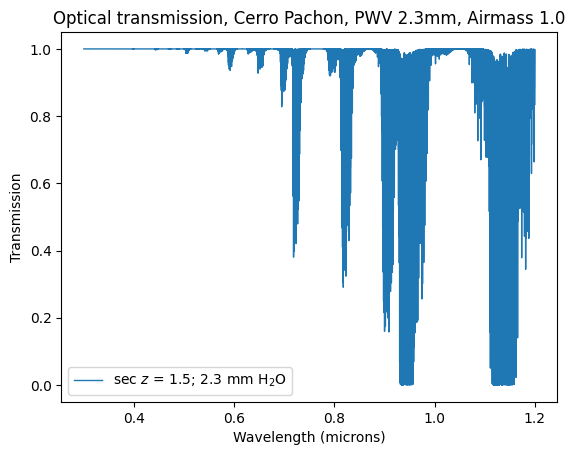

In [2]:
# 2.1 optical
# from pwv_kpno.package_settings import settings
# print(settings.available_sites)
# settings.set_site('cerro_tololo')

# https://specreduce.readthedocs.io/en/latest/extinction.html
# https://mwvgroup.github.io/pwv_kpno/1.0.0/documentation/html/index.html
# https://specreduce.readthedocs.io/en/latest/api/specreduce.calibration_data.AtmosphericTransmission.html#specreduce.calibration_data.AtmosphericTransmission
from specreduce.calibration_data import AtmosphericTransmission, SUPPORTED_EXTINCTION_MODELS
fig, ax = plt.subplots()
# ext_default = AtmosphericTransmission()
ext_custom = AtmosphericTransmission(data_file="2.3mm_pwv_transmission.txt") # file is natively in angstroms
# ax.plot(ext_default.spectral_axis, ext_default.transmission, label=r"sec $z$ = 1; 1 mm H$_{2}$O", linewidth=1)
ax.plot(ext_custom.spectral_axis/10000, ext_custom.transmission, label=r"sec $z$ = 1.5; 2.3 mm H$_{2}$O", linewidth=1)
ax.legend(loc="lower left")
ax.set_title('Optical transmission, Cerro Pachon, PWV 2.3mm, Airmass 1.0')
# ax.set_title('Optical transmission, which site? PWV 1 mm, Airmass 1.0')
ax.set_xlabel("Wavelength (microns)")
ax.set_ylabel("Transmission")
plt.show()

Text(0.5, 0, 'Wavelength (microns)')

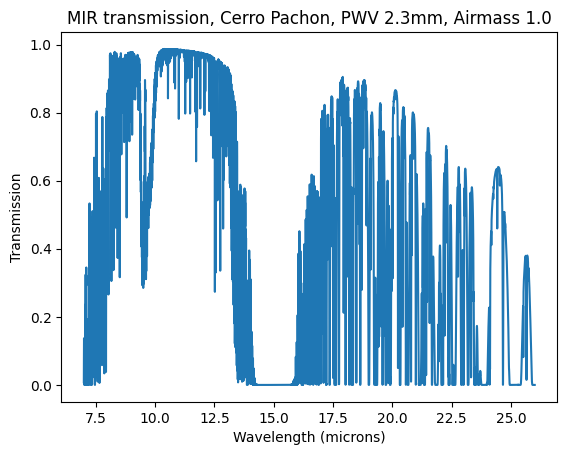

In [3]:
# 2.1 mid infrared
# https://www.gemini.edu/observing/telescopes-and-sites/sites#Transmission
MIR = ascii.read('cptrans_nq_23_10.dat.txt')
# print(MIR)
plt.plot(MIR['col1'], MIR['col2'])
plt.title('MIR transmission, Cerro Pachon, PWV 2.3mm, Airmass 1.0')
plt.ylabel('Transmission')
plt.xlabel('Wavelength (microns)')

Text(0.5, 0, 'Wavelength (microns)')

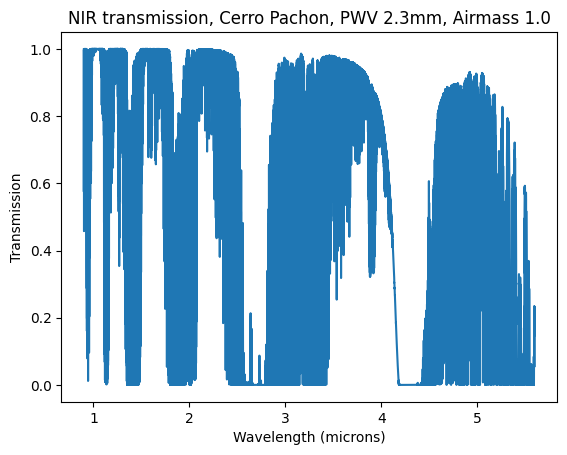

In [4]:
# 2.1 near infrared
NIR = ascii.read('cptrans_zm_23_10.dat.txt')
plt.plot(NIR['col1'], NIR['col2'])
plt.title('NIR transmission, Cerro Pachon, PWV 2.3mm, Airmass 1.0')
plt.ylabel('Transmission')
plt.xlabel('Wavelength (microns)')

Text(0.5, 0, 'Wavelength (Angstroms)')

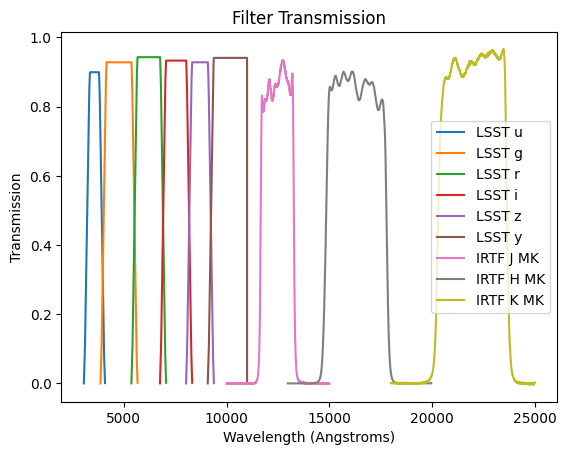

In [5]:
# 2.2
# http://svo2.cab.inta-csic.es/theory/fps3/index.php?mode=browse&gname=LSST&asttype=
# https://irtfweb.ifa.hawaii.edu/~nsfcam2/Filter_Profiles.html

LSST_u = ascii.read('LSST_LSST.u_filter.dat') # angstroms
LSST_g = ascii.read('LSST_LSST.g_filter.dat')
LSST_r = ascii.read('LSST_LSST.r_filter.dat')
LSST_i = ascii.read('LSST_LSST.i_filter.dat')
LSST_z = ascii.read('LSST_LSST.z_filter.dat')
LSST_y = ascii.read('LSST_LSST.y_filter.dat')
IRTF_J_MK = ascii.read('nsfcam_jmk_trans.dat.txt') # microns
IRTF_H_MK = ascii.read('nsfcam_hmk_trans.dat.txt')
IRTF_K_MK = ascii.read('nsfcam_kmk_trans.dat.txt')

plt.plot(LSST_u['col1'], LSST_u['col2'], label='LSST u')
plt.plot(LSST_g['col1'], LSST_g['col2'], label='LSST g')
plt.plot(LSST_r['col1'], LSST_r['col2'], label='LSST r')
plt.plot(LSST_i['col1'], LSST_i['col2'], label='LSST i')
plt.plot(LSST_z['col1'], LSST_z['col2'], label='LSST z')
plt.plot(LSST_y['col1'], LSST_y['col2'], label='LSST y')
plt.plot(IRTF_J_MK['WL (Micrometers)']*10000, IRTF_J_MK['Transmission (%)']/100, label='IRTF J MK')
plt.plot(IRTF_H_MK['WL (Micrometers)']*10000, IRTF_H_MK['Transmission (%)']/100, label='IRTF H MK')
plt.plot(IRTF_K_MK['WL (Micrometers)']*10000, IRTF_K_MK['Transmission (%)']/100, label='IRTF K MK')
plt.legend()
plt.title('Filter Transmission')
plt.ylabel('Transmission')
plt.xlabel('Wavelength (Angstroms)')

Text(0, 0.5, 'Flux (erg s-1 cm-2 Ang-1)')

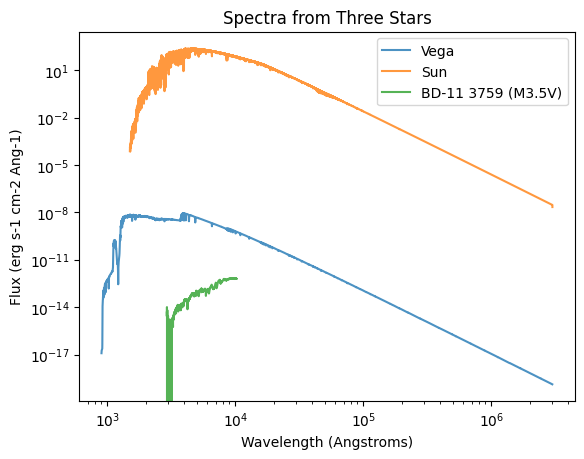

In [7]:
# 2.3
# https://www.researchgate.net/profile/C-Chiosi/publication/1925441/figure/fig1/AS:339731901632519@1458009805844/The-filter-sets-used-in-the-present-work-From-top-to-bottom-we-show-the-filter-detector.png
# https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/calspec
# https://archive.stsci.edu/hlsps/reference-atlases/cdbs/current_calspec/
# alpha_lyr_mod_004.fits, A0V
# etauma_mod_004.fits, B3V
# hd115169_mod_004.fits, G3V

vega = fits.open('alpha_lyr_mod_004.fits')
# vega_hdr = vega[0].header
vega_data = vega[1].data
vega_wavelength = vega[1].data['WAVELENGTH']
vega_flux = vega[1].data['FLUX']
# column3 is continuum
# HISTORY UNITS: Wavelength(Angstroms), Flux(erg s-1 cm-2 Ang-1)
# HISTORY All wavelengths are in vacuum & adjusted for radial vel= -21.0

# etauma = fits.open('etauma_mod_004.fits')
# etauma_data = etauma[1].data
# etauma_wavelength = etauma[1].data['WAVELENGTH']
# etauma_flux = etauma[1].data['FLUX']

# hd = fits.open('hd115169_mod_004.fits')
# hd_data = hd[1].data
# hd_wavelength = hd[1].data['WAVELENGTH']
# hd_flux = hd[1].data['FLUX']

sun = fits.open('sun_mod_001.fits')
sun_data = sun[1].data
sun_wavelength = sun[1].data['WAVELENGTH']
sun_flux = sun[1].data['FLUX']

bd = fits.open('bd11d3759_stis_003.fits')
bd_data = bd[1].data
bd_wavelength = bd[1].data['WAVELENGTH']
bd_flux = bd[1].data['FLUX']

plt.plot(vega_wavelength, vega_flux, label='Vega', alpha=0.8)
plt.plot(sun_wavelength, sun_flux, label='Sun', alpha=0.8)
plt.plot(bd_wavelength, bd_flux, label='BD-11 3759 (M3.5V)', alpha=0.8)
plt.legend()
plt.title('Spectra from Three Stars')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (erg s-1 cm-2 Ang-1)')
# plt.xlim(10**2.5, 10**5.8)
# plt.ylim(10**(-22), 10**(-7))

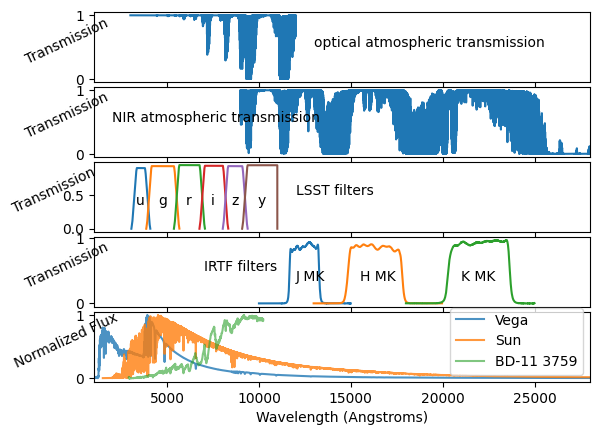

In [36]:
# The pinnacle of Question 2! Recreate the plot

# convert filter transmissions from photon counts to measuring energy? 
# do I need to interpolate my optical and NIR transmission curves?
# does MIR transmission need to be in the plot?

low_xlim = 1000
high_xlim = 28000
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/ganged_plots.html#sphx-glr-gallery-subplots-axes-and-figures-ganged-plots-py
fig, axs = plt.subplots(5, 1, sharex=True)
fig.subplots_adjust(hspace=0.07) # Remove vertical space between Axes

# optical transmission
axs[0].plot(ext_custom.spectral_axis, ext_custom.transmission)
axs[0].set_ylabel('Transmission', rotation=25)
axs[0].annotate('optical atmospheric transmission', xy=(13000, 0.5))
axs[0].set_xlim(low_xlim, high_xlim)

# NIR transmission
axs[1].plot(NIR['col1']*10000, NIR['col2']) 
axs[1].set_ylabel('Transmission', rotation=25)
axs[1].annotate('NIR atmospheric transmission', xy=(2000, 0.5))
axs[1].set_xlim(low_xlim, high_xlim)

# LSST filters
axs[2].plot(LSST_u['col1'], LSST_u['col2'], label='LSST u')
axs[2].plot(LSST_g['col1'], LSST_g['col2'], label='LSST g')
axs[2].plot(LSST_r['col1'], LSST_r['col2'], label='LSST r')
axs[2].plot(LSST_i['col1'], LSST_i['col2'], label='LSST i')
axs[2].plot(LSST_z['col1'], LSST_z['col2'], label='LSST z')
axs[2].plot(LSST_y['col1'], LSST_y['col2'], label='LSST y')
axs[2].set_ylabel('Transmission', rotation=25)
axs[2].annotate('LSST filters', xy=(12000, 0.5))
axs[2].annotate('u', xy=(3300, 0.35))
axs[2].annotate('g', xy=(4500, 0.35))
axs[2].annotate('r', xy=(6000, 0.35))
axs[2].annotate('i', xy=(7400, 0.35))
axs[2].annotate('z', xy=(8500, 0.35))
axs[2].annotate('y', xy=(9900, 0.35))
axs[2].set_xlim(low_xlim, high_xlim)

# IRTF filters
axs[3].plot(IRTF_J_MK['WL (Micrometers)']*10000, IRTF_J_MK['Transmission (%)']/100, label='IRTF J MK')
axs[3].plot(IRTF_H_MK['WL (Micrometers)']*10000, IRTF_H_MK['Transmission (%)']/100, label='IRTF H MK')
axs[3].plot(IRTF_K_MK['WL (Micrometers)']*10000, IRTF_K_MK['Transmission (%)']/100, label='IRTF K MK')
axs[3].set_ylabel('Transmission', rotation=25)
axs[3].annotate('IRTF filters', xy=(7000, 0.5))
axs[3].annotate('J MK', xy=(12000, 0.35))
axs[3].annotate('H MK', xy=(15500, 0.35))
axs[3].annotate('K MK', xy=(21000, 0.35))
axs[3].set_xlim(low_xlim, high_xlim)

# stellar spectra
axs[4].plot(vega_wavelength, vega_flux/np.max(vega_flux), label='Vega', alpha=0.8)
axs[4].plot(sun_wavelength, sun_flux/np.max(sun_flux), label='Sun', alpha=0.8)
axs[4].plot(bd_wavelength, bd_flux/np.max(bd_flux), label='BD-11 3759', alpha=0.6)
axs[4].legend()
# axs[4].set_xscale('log') # is this a problem because 
axs[4].set_xlabel('Wavelength (Angstroms)')
axs[4].set_ylabel('Normalized Flux', rotation=25)
axs[4].set_xlim(low_xlim, high_xlim)

plt.show()

# Q3. Combine the filter transmission and your atmosphere transmission - we'll assume the mirror and CCDs are perfect over the entire wavelength range. Implement the integrals for flux and magnitude discussed in Lecture 3 as python code. (40 pts)

- You'll have to do something to `interpolate` measurements continuously across the full wavelength range you have across Optical to NIR (you can ignore the MIR file for now, but you'll want it next week)
- Make sure the units are consistent for both wavelength and transmission before you write your interpolator or address differences in some other way 
- You'll need to make sure your interpolator can match the wavelength spacing of the SEDs in Q2
- Rememeber that the intergrals intclude the transmission $T(\lambda)$, which is not normalized properly, so make sure to normalize your integral appropriately
- Normalize the synthetic flux in two ways
    1. such as Vega has magnitude 0 in each band.
    2. such that a synthetic AB source has magnitude 0 in each band

Report the magitudes of the Sun and BD-11 3759 in the Vega and AB system, and the AB magnitudes of Vega in a table (columns = passbands, rows = star/system)

- 15 pts each for the Sun and BD-11 3759 (2 pts for the six optical bands, 1 pt each for JHK) 
- 10 pts for the AB mags of Vega (yes, I know there are 9 bands, not 10, but you can have the one extra)

Text(0, 0.5, 'Transmission')

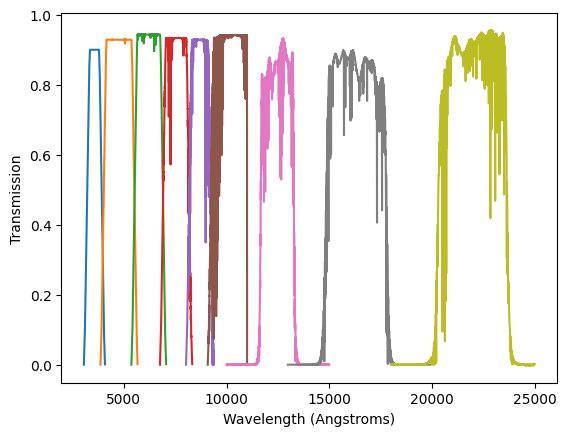

In [90]:
### COMBINE FILTER TRANSMISSION AND ATMOSPHERIC TRANSMISSION

# x = LSST_i['col1'] # i filter wavelengths in overlapping region
# xp = ext_custom.spectral_axis[low:high] # optical atmospheric wavelengths in overlapping region
# fp = ext_custom.transmission[low:high] # optical atmospheric transmission in overlapping region
# returns optical atmospheric transmission at filter wavelengths

low_u = np.argwhere(ext_custom.spectral_axis.value == LSST_u['col1'][0])[0][0]
high_u = np.argwhere(ext_custom.spectral_axis.value == LSST_u['col1'][-1])[0][0]
interp_u = np.interp(LSST_u['col1'], 
                   ext_custom.spectral_axis[low_u:high_u], 
                   ext_custom.transmission[low_u:high_u]) 
# avg_spectra_u = (interp_u+LSST_u['col2'])/2
avg_spectra_u = interp_u*LSST_u['col2']

low_g = np.argwhere(ext_custom.spectral_axis.value == LSST_g['col1'][0])[0][0]
high_g = np.argwhere(ext_custom.spectral_axis.value == LSST_g['col1'][-1])[0][0]
interp_g = np.interp(LSST_g['col1'], 
                   ext_custom.spectral_axis[low_g:high_g], 
                   ext_custom.transmission[low_g:high_g]) 
# avg_spectra_g = (interp_g+LSST_g['col2'])/2
avg_spectra_g = interp_g*LSST_g['col2']

low_r = np.argwhere(ext_custom.spectral_axis.value == LSST_r['col1'][0])[0][0]
high_r = np.argwhere(ext_custom.spectral_axis.value == LSST_r['col1'][-1])[0][0]
interp_r = np.interp(LSST_r['col1'], 
                   ext_custom.spectral_axis[low_r:high_r], 
                   ext_custom.transmission[low_r:high_r]) 
# avg_spectra_r = (interp_r+LSST_r['col2'])/2
avg_spectra_r = interp_r*LSST_r['col2']

low_i = np.argwhere(ext_custom.spectral_axis.value == LSST_i['col1'][0])[0][0]
high_i = np.argwhere(ext_custom.spectral_axis.value == LSST_i['col1'][-1])[0][0]
interp_i = np.interp(LSST_i['col1'], 
                   ext_custom.spectral_axis[low_i:high_i], 
                   ext_custom.transmission[low_i:high_i]) 
# avg_spectra_i = (interp_i+LSST_i['col2'])/2
avg_spectra_i = interp_i*LSST_i['col2']

low_z = np.argwhere(ext_custom.spectral_axis.value == LSST_z['col1'][0])[0][0]
high_z = np.argwhere(ext_custom.spectral_axis.value == LSST_z['col1'][-1])[0][0]
interp_z = np.interp(LSST_z['col1'], 
                   ext_custom.spectral_axis[low_z:high_z], 
                   ext_custom.transmission[low_z:high_z]) 
# avg_spectra_z = (interp_z+LSST_z['col2'])/2
avg_spectra_z = interp_z*LSST_z['col2']

low_y = np.argwhere(NIR['col1']*10000 == LSST_y['col1'][0])[0][0]
high_y = np.argwhere(NIR['col1']*10000 == LSST_y['col1'][-1])[0][0]
interp_y = np.interp(LSST_y['col1'], 
                   NIR['col1'][low_y:high_y]*10000, 
                   NIR['col2'][low_y:high_y]) 
# avg_spectra_y = (interp_y+LSST_y['col2'])/2
avg_spectra_y = interp_y*LSST_y['col2']

low_J = np.argwhere(NIR['col1']*10000 == np.min(IRTF_J_MK['WL (Micrometers)'])*10000)[0][0]
high_J = np.argwhere(NIR['col1']*10000 == np.max(IRTF_J_MK['WL (Micrometers)'])*10000)[0][0]
interp_J = np.interp(IRTF_J_MK['WL (Micrometers)']*10000, 
                   NIR['col1'][low_J:high_J]*10000, 
                   NIR['col2'][low_J:high_J]) 
# avg_spectra_J = (interp_J+IRTF_J_MK['Transmission (%)']/100)/2
avg_spectra_J = interp_J*IRTF_J_MK['Transmission (%)']/100

low_H = np.argwhere(NIR['col1']*10000 == np.min(IRTF_H_MK['WL (Micrometers)'])*10000)[0][0]
high_H = np.argwhere(NIR['col1']*10000 == np.max(IRTF_H_MK['WL (Micrometers)'])*10000)[0][0]
interp_H = np.interp(IRTF_H_MK['WL (Micrometers)']*10000, 
                   NIR['col1'][low_H:high_H]*10000, 
                   NIR['col2'][low_H:high_H]) 
# avg_spectra_H = (interp_H+IRTF_H_MK['Transmission (%)']/100)/2
avg_spectra_H = interp_H*IRTF_H_MK['Transmission (%)']/100

low_K = np.argwhere(NIR['col1']*10000 == np.min(IRTF_K_MK['WL (Micrometers)'])*10000)[0][0]
high_K = np.argwhere(NIR['col1']*10000 == np.max(IRTF_K_MK['WL (Micrometers)'])*10000)[0][0]
interp_K = np.interp(IRTF_K_MK['WL (Micrometers)']*10000, 
                   NIR['col1'][low_K:high_K]*10000, 
                   NIR['col2'][low_K:high_K]) 
# avg_spectra_K = (interp_K+IRTF_K_MK['Transmission (%)']/100)/2
avg_spectra_K = interp_K*IRTF_K_MK['Transmission (%)']/100

plt.plot(LSST_u['col1'], avg_spectra_u)
plt.plot(LSST_g['col1'], avg_spectra_g)
plt.plot(LSST_r['col1'], avg_spectra_r)
plt.plot(LSST_i['col1'], avg_spectra_i)
plt.plot(LSST_z['col1'], avg_spectra_z)
plt.plot(LSST_y['col1'], avg_spectra_y)
plt.plot(IRTF_J_MK['WL (Micrometers)']*10000, avg_spectra_J)
plt.plot(IRTF_H_MK['WL (Micrometers)']*10000, avg_spectra_H)
plt.plot(IRTF_K_MK['WL (Micrometers)']*10000, avg_spectra_K)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Transmission')

In [92]:
### IMPLEMENT INTEGRALS FOR FLUX AND MAGNITUDE (TESTING)
# gautham's paper: https://ui.adsabs.harvard.edu/abs/2019ApJS..241...20N/abstract
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html
# Vega_num = sp.integrate.simpson(y=(vega_wavelength*vega_flux*response), x=vega_wavelength)
# where response for the g band is avg_spectra_g
# Vega_dem = sp.integrate.simpson(y=(vega_wavelength*response), x=vega_wavelength)
# Vega_synth_flux = Vega_num/Vega_dem
# do this for each band

# vega array within the bounds of the g band
vega_g_wave = vega_wavelength[np.argwhere((LSST_g['col1'][0] < vega_wavelength) & (vega_wavelength < LSST_g['col1'][-1]))][:,0]
vega_g_flux = vega_flux[np.argwhere((LSST_g['col1'][0] < vega_wavelength) & (vega_wavelength < LSST_g['col1'][-1]))][:,0]

interp_g_response = np.interp(vega_g_wave, # vega wavelengths
                   LSST_g['col1'], # response function wavelengths
                   avg_spectra_g)  # response function transmission
# want to return response function transmission at vega wavelengths

vega_num_g = sp.integrate.trapezoid(y=(vega_g_wave*vega_g_flux*interp_g_response), x=vega_g_wave)
vega_den_g = sp.integrate.simpson(y=(vega_g_wave*interp_g_response), x=vega_g_wave)
vega_synth_flux_g = vega_num_g/vega_den_g
print(vega_synth_flux_g)

5.314314484302021e-09


In [93]:
### IMPLEMENT INTEGRALS FOR FLUX AND MAGNITUDE (TESTING)
sun_J_wave = sun_wavelength[np.argwhere((np.min(IRTF_J_MK['WL (Micrometers)']*10000) < sun_wavelength) & (sun_wavelength < np.max(IRTF_J_MK['WL (Micrometers)']*10000)))][:,0]
sun_J_flux = sun_flux[np.argwhere((np.min(IRTF_J_MK['WL (Micrometers)']*10000) < sun_wavelength) & (sun_wavelength < np.max(IRTF_J_MK['WL (Micrometers)']*10000)))][:,0]
interp_J_response = np.interp(sun_J_wave, # vega wavelengths
                   IRTF_J_MK['WL (Micrometers)']*10000, # response function wavelengths
                   avg_spectra_J)  # response function transmission
# want to return response function transmission at vega wavelengths

sun_num_J = sp.integrate.trapezoid(y=(sun_J_wave*sun_J_flux*interp_J_response), x=sun_J_wave)
sun_den_J = sp.integrate.simpson(y=(sun_J_wave*interp_J_response), x=sun_J_wave)
sun_synth_flux_J = sun_num_J/sun_den_J
print(sun_synth_flux_J)

45.13326998941633


In [120]:
### IMPLEMENT INTEGRAL FOR FLUX
def find_synth_flux(star, band): 
    # star and band must be strings
    # star = 'vega' or 'sun' or 'bd'
    # band = 'u', 'g', 'r', 'i', 'z', 'y', 'J', 'H', 'K'
    if star == 'vega':
        star_wavelength = vega_wavelength
        star_flux = vega_flux
    if star == 'sun':
        star_wavelength = sun_wavelength
        star_flux = sun_flux
    if star == 'bd':
        star_wavelength = bd_wavelength
        star_flux = bd_flux
    if band == 'u':
        band_wavelength = LSST_u['col1']
        response_func = avg_spectra_u
    if band == 'g':
        band_wavelength = LSST_g['col1']
        response_func = avg_spectra_g
    if band == 'r':
        band_wavelength = LSST_r['col1']
        response_func = avg_spectra_r
    if band == 'i':
        band_wavelength = LSST_i['col1']
        response_func = avg_spectra_i
    if band == 'z':
        band_wavelength = LSST_z['col1']
        response_func = avg_spectra_z
    if band == 'y':
        band_wavelength = LSST_y['col1']
        response_func = avg_spectra_y
    if band == 'J':
        band_wavelength = IRTF_J_MK['WL (Micrometers)']*10000
        response_func = avg_spectra_J
    if band == 'H':
        band_wavelength = IRTF_H_MK['WL (Micrometers)']*10000
        response_func = avg_spectra_H
    if band == 'K':
        band_wavelength = IRTF_K_MK['WL (Micrometers)']*10000
        response_func = avg_spectra_K

    if band == 'u' or band == 'g' or band == 'r' or band == 'i' or band == 'z' or band == 'y':
        star_band_wave = star_wavelength[np.argwhere((band_wavelength[0] < star_wavelength) & (star_wavelength < band_wavelength[-1]))][:,0]
        star_band_flux = star_flux[np.argwhere((band_wavelength[0] < star_wavelength) & (star_wavelength < band_wavelength[-1]))][:,0]
    if band == 'J' or band == 'H' or band == 'K':
        star_band_wave = star_wavelength[np.argwhere((np.min(band_wavelength) < star_wavelength) & (star_wavelength < np.max(band_wavelength)))][:,0]
        star_band_flux = star_flux[np.argwhere((np.min(band_wavelength) < star_wavelength) & (star_wavelength < np.max(band_wavelength)))][:,0]
        
    interp_band_response = np.interp(star_band_wave, # star wavelengths within band wavelength parameters
                                  band_wavelength, # response function wavelengths
                                  response_func)  # response function transmission
    # want to return response function transmission at vega wavelengths

    star_band_numerator = sp.integrate.simpson(y=(star_band_wave*star_band_flux*interp_band_response), x=star_band_wave)
    star_band_denominator = sp.integrate.simpson(y=(star_band_wave*interp_band_response), x=star_band_wave)
    star_band_synth_flux = star_band_numerator/star_band_denominator
    return star_band_synth_flux

find_synth_flux('sun', 'K')

9.222519336804279

In [113]:
### IMPLEMENT INTEGRAL FOR MAGNITUDE
def find_norm_mag(star, band):
    # star and band must be strings
    # star = 'vega' or 'sun' or 'bd'
    # band = 'u', 'g', 'r', 'i', 'z', 'y', 'J', 'H', 'K'
    if star == 'vega':
        star_wavelength = vega_wavelength
        star_flux = vega_flux
    if star == 'sun':
        star_wavelength = sun_wavelength
        star_flux = sun_flux
    if star == 'bd':
        star_wavelength = bd_wavelength
        star_flux = bd_flux
    if band == 'u':
        band_wavelength = LSST_u['col1']
        response_func = avg_spectra_u
    if band == 'g':
        band_wavelength = LSST_g['col1']
        response_func = avg_spectra_g
    if band == 'r':
        band_wavelength = LSST_r['col1']
        response_func = avg_spectra_r
    if band == 'i':
        band_wavelength = LSST_i['col1']
        response_func = avg_spectra_i
    if band == 'z':
        band_wavelength = LSST_z['col1']
        response_func = avg_spectra_z
    if band == 'y':
        band_wavelength = LSST_y['col1']
        response_func = avg_spectra_y
    if band == 'J':
        band_wavelength = IRTF_J_MK['WL (Micrometers)']*10000
        response_func = avg_spectra_J
    if band == 'H':
        band_wavelength = IRTF_H_MK['WL (Micrometers)']*10000
        response_func = avg_spectra_H
    if band == 'K':
        band_wavelength = IRTF_K_MK['WL (Micrometers)']*10000
        response_func = avg_spectra_K

    if band == 'u' or band == 'g' or band == 'r' or band == 'i' or band == 'z' or band == 'y':
        star_band_wave = star_wavelength[np.argwhere((band_wavelength[0] < star_wavelength) & (star_wavelength < band_wavelength[-1]))][:,0]
        star_band_flux = star_flux[np.argwhere((band_wavelength[0] < star_wavelength) & (star_wavelength < band_wavelength[-1]))][:,0]
    if band == 'J' or band == 'H' or band == 'K':
        star_band_wave = star_wavelength[np.argwhere((np.min(band_wavelength) < star_wavelength) & (star_wavelength < np.max(band_wavelength)))][:,0]
        star_band_flux = star_flux[np.argwhere((np.min(band_wavelength) < star_wavelength) & (star_wavelength < np.max(band_wavelength)))][:,0]
        
    interp_band_response = np.interp(star_band_wave, # star wavelengths within band wavelength parameters
                                  band_wavelength, # response function wavelengths
                                  response_func)  # response function transmission
    # want to return response function transmission at vega wavelengths

    star_band_numerator = sp.integrate.simpson(y=(star_band_wave*star_band_flux*interp_band_response), x=star_band_wave)
    return star_band_numerator

mag = -2.5*np.log10(find_norm_mag('sun', 'u')/find_norm_mag('vega', 'u'))
print(mag)

-26.002326490667112


In [126]:
### CONSTRUCT TABLE OF MAGNITUDES 
# magnitude conversion resources:
# https://www.stsci.edu/hst/instrumentation/acs/data-analysis/zeropoints
# https://mips.as.arizona.edu/~cnaw/sun.html
# https://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html
# https://iopscience.iop.org/article/10.3847/1538-4365/aabfdf#apjsaabfdft3

delta_mag_u = 0.627
delta_mag_g = -0.116
delta_mag_r = 0.121
delta_mag_i = 0.340
delta_mag_z = 0.484
delta_mag_y = 0.520
delta_mag_J = 0.891
delta_mag_H = 1.329
delta_mag_K = 1.848

u_column = [round(-2.5*np.log10(find_norm_mag('sun', 'u')/find_norm_mag('vega', 'u')), 3), 
            round(-2.5*np.log10(find_norm_mag('sun', 'u')/find_norm_mag('vega', 'u')) + delta_mag_u, 3), 
            round(-2.5*np.log10(find_norm_mag('bd', 'u')/find_norm_mag('vega', 'u')), 3), 
            round(-2.5*np.log10(find_norm_mag('bd', 'u')/find_norm_mag('vega', 'u')) + delta_mag_u, 3), 
            round(-2.5*np.log10(find_norm_mag('vega', 'u')/find_norm_mag('vega', 'u')) + delta_mag_u, 3)]

g_column = [round(-2.5*np.log10(find_norm_mag('sun', 'g')/find_norm_mag('vega', 'g')), 3), 
            round(-2.5*np.log10(find_norm_mag('sun', 'g')/find_norm_mag('vega', 'g')) + delta_mag_g, 3), 
            round(-2.5*np.log10(find_norm_mag('bd', 'g')/find_norm_mag('vega', 'g')), 3), 
            round(-2.5*np.log10(find_norm_mag('bd', 'g')/find_norm_mag('vega', 'g')) + delta_mag_g, 3), 
            round(-2.5*np.log10(find_norm_mag('vega', 'g')/find_norm_mag('vega', 'g')) + delta_mag_g, 3)]

r_column = [round(-2.5*np.log10(find_norm_mag('sun', 'r')/find_norm_mag('vega', 'r')), 3), 
            round(-2.5*np.log10(find_norm_mag('sun', 'r')/find_norm_mag('vega', 'r')) + delta_mag_r, 3), 
            round(-2.5*np.log10(find_norm_mag('bd', 'r')/find_norm_mag('vega', 'r')), 3), 
            round(-2.5*np.log10(find_norm_mag('bd', 'r')/find_norm_mag('vega', 'r')) + delta_mag_r, 3), 
            round(-2.5*np.log10(find_norm_mag('vega', 'r')/find_norm_mag('vega', 'r')) + delta_mag_r, 3)]

i_column = [round(-2.5*np.log10(find_norm_mag('sun', 'i')/find_norm_mag('vega', 'i')), 3), 
            round(-2.5*np.log10(find_norm_mag('sun', 'i')/find_norm_mag('vega', 'i')) + delta_mag_i, 3), 
            round(-2.5*np.log10(find_norm_mag('bd', 'i')/find_norm_mag('vega', 'i')), 3), 
            round(-2.5*np.log10(find_norm_mag('bd', 'i')/find_norm_mag('vega', 'i')) + delta_mag_i, 3), 
            round(-2.5*np.log10(find_norm_mag('vega', 'i')/find_norm_mag('vega', 'i')) + delta_mag_i, 3)]

z_column = [round(-2.5*np.log10(find_norm_mag('sun', 'z')/find_norm_mag('vega', 'z')), 3), 
            round(-2.5*np.log10(find_norm_mag('sun', 'z')/find_norm_mag('vega', 'z')) + delta_mag_z, 3), 
            round(-2.5*np.log10(find_norm_mag('bd', 'z')/find_norm_mag('vega', 'z')), 3), 
            round(-2.5*np.log10(find_norm_mag('bd', 'z')/find_norm_mag('vega', 'z')) + delta_mag_z, 3), 
            round(-2.5*np.log10(find_norm_mag('vega', 'z')/find_norm_mag('vega', 'z')) + delta_mag_z, 3)]

y_column = [round(-2.5*np.log10(find_norm_mag('sun', 'y')/find_norm_mag('vega', 'y')), 3), 
            round(-2.5*np.log10(find_norm_mag('sun', 'y')/find_norm_mag('vega', 'y')) + delta_mag_y, 3), 
            round(-2.5*np.log10(find_norm_mag('bd', 'y')/find_norm_mag('vega', 'y')), 3), 
            round(-2.5*np.log10(find_norm_mag('bd', 'y')/find_norm_mag('vega', 'y')) + delta_mag_y, 3), 
            round(-2.5*np.log10(find_norm_mag('vega', 'y')/find_norm_mag('vega', 'y')) + delta_mag_y, 3)]

J_column = [round(-2.5*np.log10(find_norm_mag('sun', 'J')/find_norm_mag('vega', 'J')), 3), 
            round(-2.5*np.log10(find_norm_mag('sun', 'J')/find_norm_mag('vega', 'J')) + delta_mag_J, 3), 
            round(-2.5*np.log10(find_norm_mag('bd', 'J')/find_norm_mag('vega', 'J')), 3), 
            round(-2.5*np.log10(find_norm_mag('bd', 'J')/find_norm_mag('vega', 'J')) + delta_mag_J, 3), 
            round(-2.5*np.log10(find_norm_mag('vega', 'J')/find_norm_mag('vega', 'J')) + delta_mag_J, 3)]

# no overlap between the BD-11 star and the H band
H_column = [round(-2.5*np.log10(find_norm_mag('sun', 'H')/find_norm_mag('vega', 'H')), 3), 
            round(-2.5*np.log10(find_norm_mag('sun', 'H')/find_norm_mag('vega', 'H')) + delta_mag_H, 3), 
            0, 
            0, 
            round(-2.5*np.log10(find_norm_mag('vega', 'H')/find_norm_mag('vega', 'H')) + delta_mag_H, 3)]

# no overlap between the BD-11 star and the K band
K_column = [round(-2.5*np.log10(find_norm_mag('sun', 'K')/find_norm_mag('vega', 'K')), 3), 
            round(-2.5*np.log10(find_norm_mag('sun', 'K')/find_norm_mag('vega', 'K')) + delta_mag_K, 3), 
            0, 
            0, 
            round(-2.5*np.log10(find_norm_mag('vega', 'K')/find_norm_mag('vega', 'K')) + delta_mag_K, 3)]

star_system = ['Sun, Vega system', 
               'Sun, AB system', 
               'BD-11, Vega system', 
               'BD-11, AB system', 
               'Vega, AB system']
magnitude_table = ap.table.Table([star_system, 
                                  u_column, g_column, r_column, i_column, z_column, y_column, 
                                  J_column, H_column, K_column], 
                                      names=('Star / mag system', 
                                             'u', 'g', 'r', 'i', 'z', 'y', 
                                             'J', 'H',  'K'))
print(magnitude_table)
#################################################
## Star / mag system ## u  g  r  i  z  y  J  H  K 
#################################################
# Sun, Vega system   #
# Sun, AB system     #
# BD-11, Vega system #
# BD-11, AB system   #
# Vega, AB system    #

Star / mag system     u       g       r       i       z       y       J       H       K   
------------------ ------- ------- ------- ------- ------- ------- ------- ------- -------
  Sun, Vega system -26.002 -26.368 -27.075 -27.411 -27.569 -27.666 -27.908 -28.199 -28.299
    Sun, AB system -25.375 -26.484 -26.954 -27.071 -27.085 -27.146 -27.017  -26.87 -26.451
BD-11, Vega system  14.063  12.181  10.562   8.823   7.952   8.114  10.276     0.0     0.0
  BD-11, AB system   14.69  12.065  10.683   9.163   8.436   8.634  11.167     0.0     0.0
   Vega, AB system   0.627  -0.116   0.121    0.34   0.484    0.52   0.891   1.329   1.848


### Divide and conquer, so you encounter issues in parallel and can explain things to each other, rather than working in series. 

# Due Sep 17 at Noon!

# cells with old code / notes

In [ ]:
# general formula for converting from vegamag to ABmag:
# m_AB = m_vega + deltam
# for example, in LSST_u, the m_AB of Vega is 0.627 (deltam)
# m_AB_sun = m_vega_sun + deltam (for a particular filter)

# final product: table of magnitudes
# Report the magitudes of the Sun and BD-11 3759 in the Vega and AB system, and the AB magnitudes of Vega  
# columns: passbands
# rows: star / magnitude system

# vega system is where vega has magnitude 0

In [ ]:
# convert filter tranmissions from "counting photons" to energy

# step 1
# interpolate filter and atmosphere transmission into one response function
# do separate interpolations for each wavelength range where filters exist?
# i.e., interpolate optical and LSST u, then optical and LSST g, then optical and LSST r...
# one np.interpolate statement per filter

# step 2
# implement integral -- integrate SED with response function

# questions:
# convert filter tranmissions from "counting photons" to energy
# need to make sure interpolated response function and SED are at same wavelength spacings?

# interpolation code from Graur-fit-instructions.ipynb
# x = t_blue['wavelength_blue'][1219:-1] # blue wavelengths in overlapping region
# xp = t_red['wavelength_red'][0:228] # red wavelengths in overlapping region
# fp = t_red['flux_red'][0:228] # red flux in overlapping region
# returns red flux at blue wavelengths
# interp = np.interp(x, xp, fp) # https://numpy.org/doc/stable/reference/generated/numpy.interp.html

In [ ]:
# print('length of vega array within LSST g filter bounds:')
# print(len(vega_wavelength[np.argwhere((LSST_g['col1'][0] < vega_wavelength) & (vega_wavelength < LSST_g['col1'][-1]))]))
# print('')
# print('length of interpolated response function array for g band:')
# print(len(avg_spectra_g))
# print('')
# print('length of interpolated response function array for g band, attempting to match SED wavelength spacing:')
# print(len(avg_spectra_g[::5]))

In [100]:
# plt.plot(LSST_i['col1'], LSST_i['col2'])
# plt.plot(ext_custom.spectral_axis[75200:106580], ext_custom.transmission[75200:106580], linewidth=1)
# plt.xlim(6740, 8340)
# print(LSST_i['col1'][0], LSST_i['col1'][-1])
# print(ext_custom.spectral_axis[75200], ext_custom.spectral_axis[106580])
# min and max wavelength for i filter are 6760, 8329 angstroms
# now need to find indices where atmospheric transmission matches those wavelengths

In [101]:
# all_filters = []
# all_filters = np.append(all_filters, LSST_u['col1'][np.argwhere(LSST_u['col1']<np.min(LSST_g['col1']))])
# all_filters = np.append(all_filters, LSST_g['col1'][np.argwhere(LSST_g['col1']<np.min(LSST_r['col1']))])
# print(all_filters)
# # print('')
# # print(LSST_u['col1'])